In [6]:
import pandas as pd

data = pd.read_csv("dataset/clean_weather.csv", index_col=0)
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


In [7]:
data.isnull().sum()

tmax              11
tmin              14
rain             281
tmax_tomorrow     11
dtype: int64

In [8]:
data.fillna({"tmax": data.tmax.median()}, inplace=True)
data.fillna({"tmin": data.tmin.median()}, inplace=True)
data.fillna({"rain": data.rain.median()}, inplace=True)
data.fillna({"tmax_tomorrow": data.tmax_tomorrow.median()}, inplace=True)

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

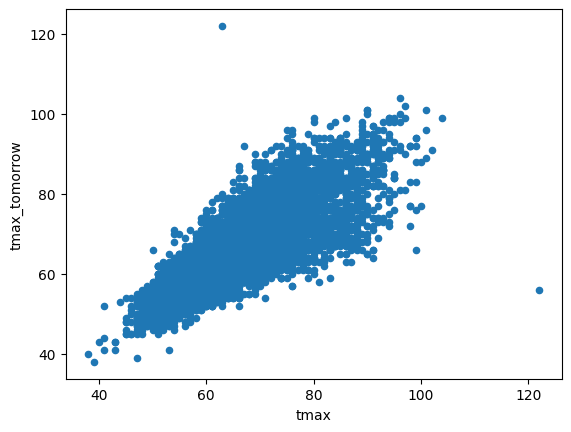

In [9]:
data.plot.scatter(x='tmax', y='tmax_tomorrow')

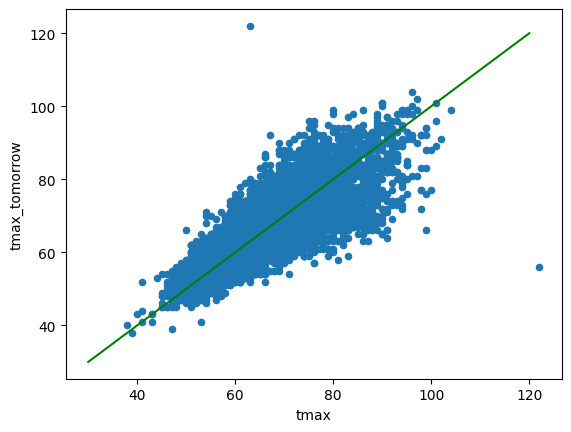

In [10]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([30,120], [30,120], "green")

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data[["tmax"]], data["tmax_tomorrow"])

LinearRegression()

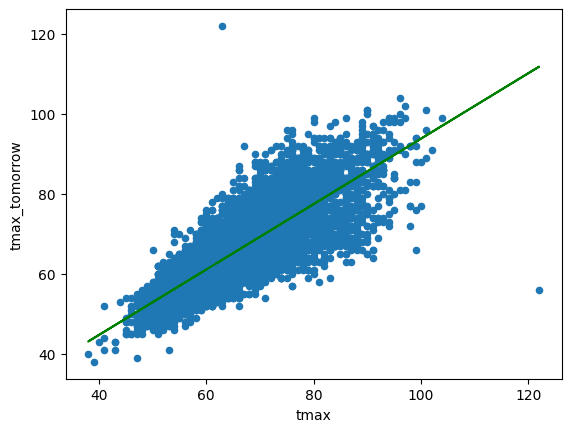

In [12]:
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot(data["tmax"],reg.predict(data[["tmax"]]), "green")

In [13]:
print(f"Weight :{reg.coef_[0]:.2f}")
print(f"Bias   :{reg.intercept_:.2f}")

Weight :0.82
Bias   :12.02


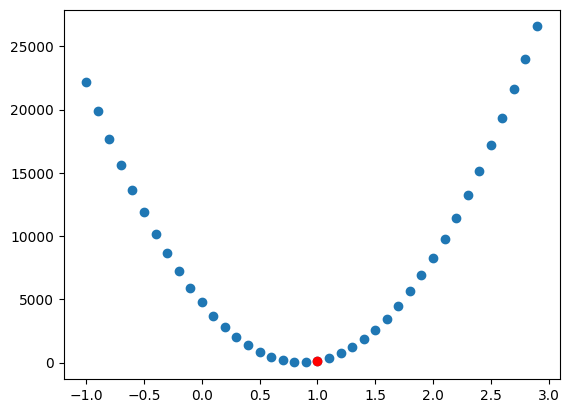

In [14]:
import numpy as np

loss = lambda w, y : ((w * 80 + 12.02) - y) ** 2
y = 81
ws = np.arange(-1, 3, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), 'ro')

In [15]:
print(loss(3,81))
print(loss(-1,81))
print(loss(1,81))
print(loss(.875,81))

29247.840400000005
22195.040400000005
121.44039999999991
1.0403999999999918


In [16]:
gradient = lambda w, y : ((w * 80 + 12.02) - y) * 2

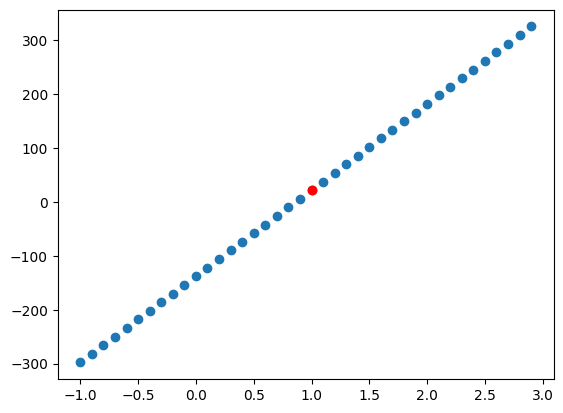

In [17]:
plt.scatter(ws, gradient(ws, y))
plt.plot(1, gradient(1, y), 'ro')

-1762.1999999999994


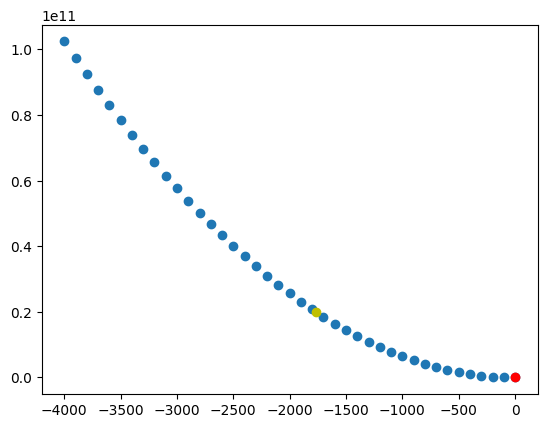

In [18]:
ws = np.arange(-4000, 100, 100)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1,y), 'ro')
new_w = 1 - gradient(1, y) * 80
print(new_w)
plt.plot(new_w, loss(new_w, y), 'yo')

-1762.1999999999994


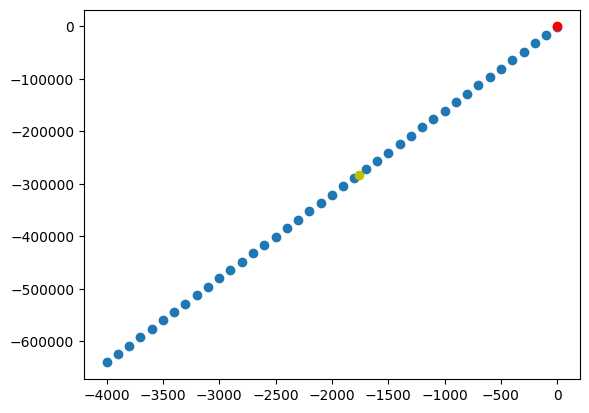

In [19]:
ws = np.arange(-4000, 100, 100)
gradients = gradient(ws, y)

plt.scatter(ws, gradients)
plt.plot(1, gradient(1,y), 'ro')
new_w = 1 - gradient(1, y) * 80
print(new_w)
plt.plot(new_w, gradient(new_w, y), 'yo')

0.91184


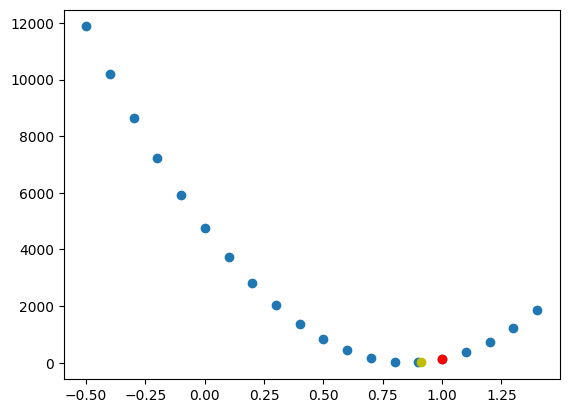

In [20]:
ws = np.arange(-.5, 1.5, .1)
losses = loss(ws,y)

plt.scatter(ws, losses)
plt.plot(1, loss(1,y), 'ro')
lr = 5e-5
new_w = 1 - lr * gradient(1, y) * 80
print(new_w)
plt.plot(new_w, loss(new_w, y), 'yo')

In [21]:
PRED = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"
np.random.seed(0)

split = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_X, train_y), (validate_X, validate_y), (test_X, test_y) = [[d[PRED].to_numpy(), d[[TARGET]].to_numpy()] for d in
                                                            split]
print(train_X.shape, train_y.shape, validate_X.shape, validate_y.shape, test_X.shape, test_y.shape)

(9456, 3) (9456, 1) (2026, 3) (2026, 1) (2027, 3) (2027, 1)


/home/joseph/Source/Sample/ML/Basics/venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
import math

def init_params(predictors):
    params = []
    np.random.seed(0)
    params.append(np.random.rand(predictors, 1))
    params.append(np.ones((1,1)))
    return params


In [47]:
def forward(X, params):
    weights = params[0]
    bias = params[1]
    return X @ weights + bias

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def mse_gradient(actual, predicted):
    return  predicted - actual

def backward(params, X, gradient, learning_rate):
    
    w_gradient = (X.T / X.shape[0]) @ gradient
    b_gradient = np.mean(gradient, axis=0)
    
    params[0] -= learning_rate * w_gradient
    params[1] -= learning_rate * b_gradient
    return params

In [43]:
learning_rate = 1e-5
print(train_X.shape[1])
p = init_params(train_X.shape[1])
pr = forward(train_X, p)
g = mse_gradient(train_y, pr)
backward(p, train_X, g, learning_rate) 


3


[array([[0.5437875 ],
        [0.71118223],
        [0.60275859]]),
 array([[0.99992396]])]

In [48]:
learning_rate = 1e-5
epochs = 50000
params = init_params(train_X.shape[1])

for i in range(epochs):
    predictions = forward(train_X,params)
    gradient = mse_gradient(train_y, predictions)

    params = backward(params, train_X,  gradient, learning_rate)

    if i % 1000 == 0:
        print(f"Epoch {i} loss : {mse(validate_y, forward(validate_X, params))}")

Epoch 0 loss : 69.06195251131214
Epoch 1000 loss : 28.550518409792463
Epoch 2000 loss : 26.82828380994394
Epoch 3000 loss : 25.633804668972722
Epoch 4000 loss : 24.800651966575767
Epoch 5000 loss : 24.215782117048544
Epoch 6000 loss : 23.802243447982228
Epoch 7000 loss : 23.507515862355113
Epoch 8000 loss : 23.295643043106264
Epoch 9000 loss : 23.141919021200664
Epoch 10000 loss : 23.029296010763396
Epoch 11000 loss : 22.945952817532078
Epoch 12000 loss : 22.88364633502495
Epoch 13000 loss : 22.836591884640825
Epoch 14000 loss : 22.800701077695646
Epoch 15000 loss : 22.77306168554206
Epoch 16000 loss : 22.751581576441627
Epoch 17000 loss : 22.73474408353911
Epoch 18000 loss : 22.721439220394046
Epoch 19000 loss : 22.710846657819154
Epoch 20000 loss : 22.702354133335877
Epoch 21000 loss : 22.69550020336724
Epoch 22000 loss : 22.689933789857218
Epoch 23000 loss : 22.685385370229973
Epoch 24000 loss : 22.68164628471054
Epoch 25000 loss : 22.678553738718687
Epoch 26000 loss : 22.6759798292